In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import locale
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
from numpy import random as rd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from biokit.viz import corrplot
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v4/version4.csv') 

In [4]:
data.head(2)

,Unnamed: 0,id,name,summary,space,description,neighborhood_overview,notes,transit,access,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,0,958.0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,...,30.0,199.0,97.0,10.0,10.0,10.0,10.0,9.0,1,2
1,1,3850.0,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...",...,5.0,136.0,94.0,9.0,10.0,10.0,9.0,9.0,0,1


In [5]:
data.shape

(7543, 47)

In [6]:
data.dtypes

Unnamed: 0                       int64
id                             float64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_about                      object
host_response_time              object
host_response_rate             float64
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                        float64
latitude                       float64
longitude                      float64
property_type            

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 47 columns):
Unnamed: 0                     7543 non-null int64
id                             7543 non-null float64
name                           7543 non-null object
summary                        7543 non-null object
space                          7543 non-null object
description                    7543 non-null object
neighborhood_overview          7543 non-null object
notes                          7543 non-null object
transit                        7543 non-null object
access                         7543 non-null object
interaction                    7543 non-null object
house_rules                    7543 non-null object
host_id                        7543 non-null int64
host_about                     7543 non-null object
host_response_time             7543 non-null object
host_response_rate             7543 non-null float64
host_is_superhost              7543 non-null int64
host_total

In [8]:
data.isnull().sum().sort_values(ascending = False)

cleaning_fee                   812
zipcode                        243
cancellation_policy              0
house_rules                      0
host_identity_verified           0
host_has_profile_pic             0
host_verifications               0
host_total_listings_count        0
host_is_superhost                0
host_response_rate               0
host_response_time               0
host_about                       0
host_id                          0
interaction                      0
access                           0
transit                          0
notes                            0
neighborhood_overview            0
description                      0
space                            0
summary                          0
name                             0
id                               0
neighbourhood_cleansed           0
latitude                         0
instant_bookable                 0
longitude                        0
review_scores_value              0
review_scores_locati

In [9]:
#fill null
data ['cleaning_fee']= data['cleaning_fee'].fillna(value = 0, axis=0)
#data ['zipcod']= data['zipcode'].fillna(value = 0, axis=0)

In [10]:
#converting some category_types and float_types
data["property_type"]=data["property_type"].astype('category')
data["room_type"]=data["room_type"].astype('category')
data["host_response_time"]=data["host_response_time"].astype('category')
data["host_is_superhost"]=data["host_is_superhost"].astype('category')
#data["zipcode"]= data["zipcode"].astype('category')
data["host_identity_verified"]=data["host_identity_verified"].astype('category')
data["host_has_profile_pic"]=data["host_has_profile_pic"].astype('category')
#data["neighbourhood_cleansed"]=data["neighbourhood_cleansed"].astype('category')
data["bed_type"]=data["bed_type"].astype('category')
data["instant_bookable"]=data["instant_bookable"].astype('category')
data["cancellation_policy"]=data["cancellation_policy"].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 47 columns):
Unnamed: 0                     7543 non-null int64
id                             7543 non-null float64
name                           7543 non-null object
summary                        7543 non-null object
space                          7543 non-null object
description                    7543 non-null object
neighborhood_overview          7543 non-null object
notes                          7543 non-null object
transit                        7543 non-null object
access                         7543 non-null object
interaction                    7543 non-null object
house_rules                    7543 non-null object
host_id                        7543 non-null int64
host_about                     7543 non-null object
host_response_time             7543 non-null category
host_response_rate             7543 non-null float64
host_is_superhost              7543 non-null category
host_

In [11]:
data.columns

Index(['Unnamed: 0', 'id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

In [12]:
#select necessary columns for Analysis & Prediction
data_new= data.loc[:,['id',
                     'host_response_time',
                     'host_response_rate',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'neighbourhood_cleansed',
                     'zipcode',
                     'latitude',
                     'longitude',
                     'property_type',
                     'room_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'bed_type',               
                     'price',
                     'security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',
                     'number_of_reviews',
                     'instant_bookable',
                      'cancellation_policy']]
data_new.shape

(7543, 25)

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 25 columns):
id                           7543 non-null float64
host_response_time           7543 non-null category
host_response_rate           7543 non-null float64
host_is_superhost            7543 non-null category
host_total_listings_count    7543 non-null float64
host_has_profile_pic         7543 non-null category
neighbourhood_cleansed       7543 non-null int64
zipcode                      7300 non-null float64
latitude                     7543 non-null float64
longitude                    7543 non-null float64
property_type                7543 non-null category
room_type                    7543 non-null category
accommodates                 7543 non-null float64
bathrooms                    7543 non-null float64
bedrooms                     7543 non-null float64
beds                         7543 non-null float64
bed_type                     7543 non-null category
price                 

In [14]:
data_new.describe()

,id,host_response_rate,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews
count,7.543000e+03,7543.000000,7543.000000,7543.000000,7300.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7.543000e+03,7.543000e+03,7543.000000
mean,1.925702e+07,86.669097,81.293517,10.188652,94114.788082,37.766187,-122.429945,3.184807,1.390760,1.348402,1.766539,215.793186,380.466525,98.615935,1.327383e+04,1.379682e+04,44.053427
std,1.142656e+07,30.979553,281.418767,8.263611,9.489816,0.022548,0.026726,1.917704,0.905469,0.926810,1.181370,258.207501,702.248711,87.498834,1.151404e+06,1.151399e+06,75.172690
min,9.580000e+02,0.000000,0.000000,1.000000,94080.000000,37.708380,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000
25%,8.763386e+06,95.000000,1.000000,3.000000,94109.000000,37.751585,-122.442335,2.000000,1.000000,1.000000,1.000000,100.000000,0.000000,35.000000,2.000000e+00,2.900000e+01,1.000000
50%,2.072478e+07,100.000000,2.000000,8.000000,94114.000000,37.768760,-122.424470,2.000000,1.000000,1.000000,1.000000,152.000000,150.000000,85.000000,4.000000e+00,1.800000e+02,11.000000
75%,2.984512e+07,100.000000,10.000000,16.000000,94121.000000,37.785495,-122.410720,4.000000,1.500000,2.000000,2.000000,249.000000,500.000000,148.000000,3.000000e+01,1.125000e+03,53.000000
max,3.749720e+07,100.000000,1465.000000,36.000000,94158.000000,37.810310,-122.368570,16.000000,10.000000,8.000000,20.000000,8000.000000,5100.000000,700.000000,1.000000e+08,1.000000e+08,730.000000


In [15]:
data.to_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v5/data_selected.csv',index=0)

Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

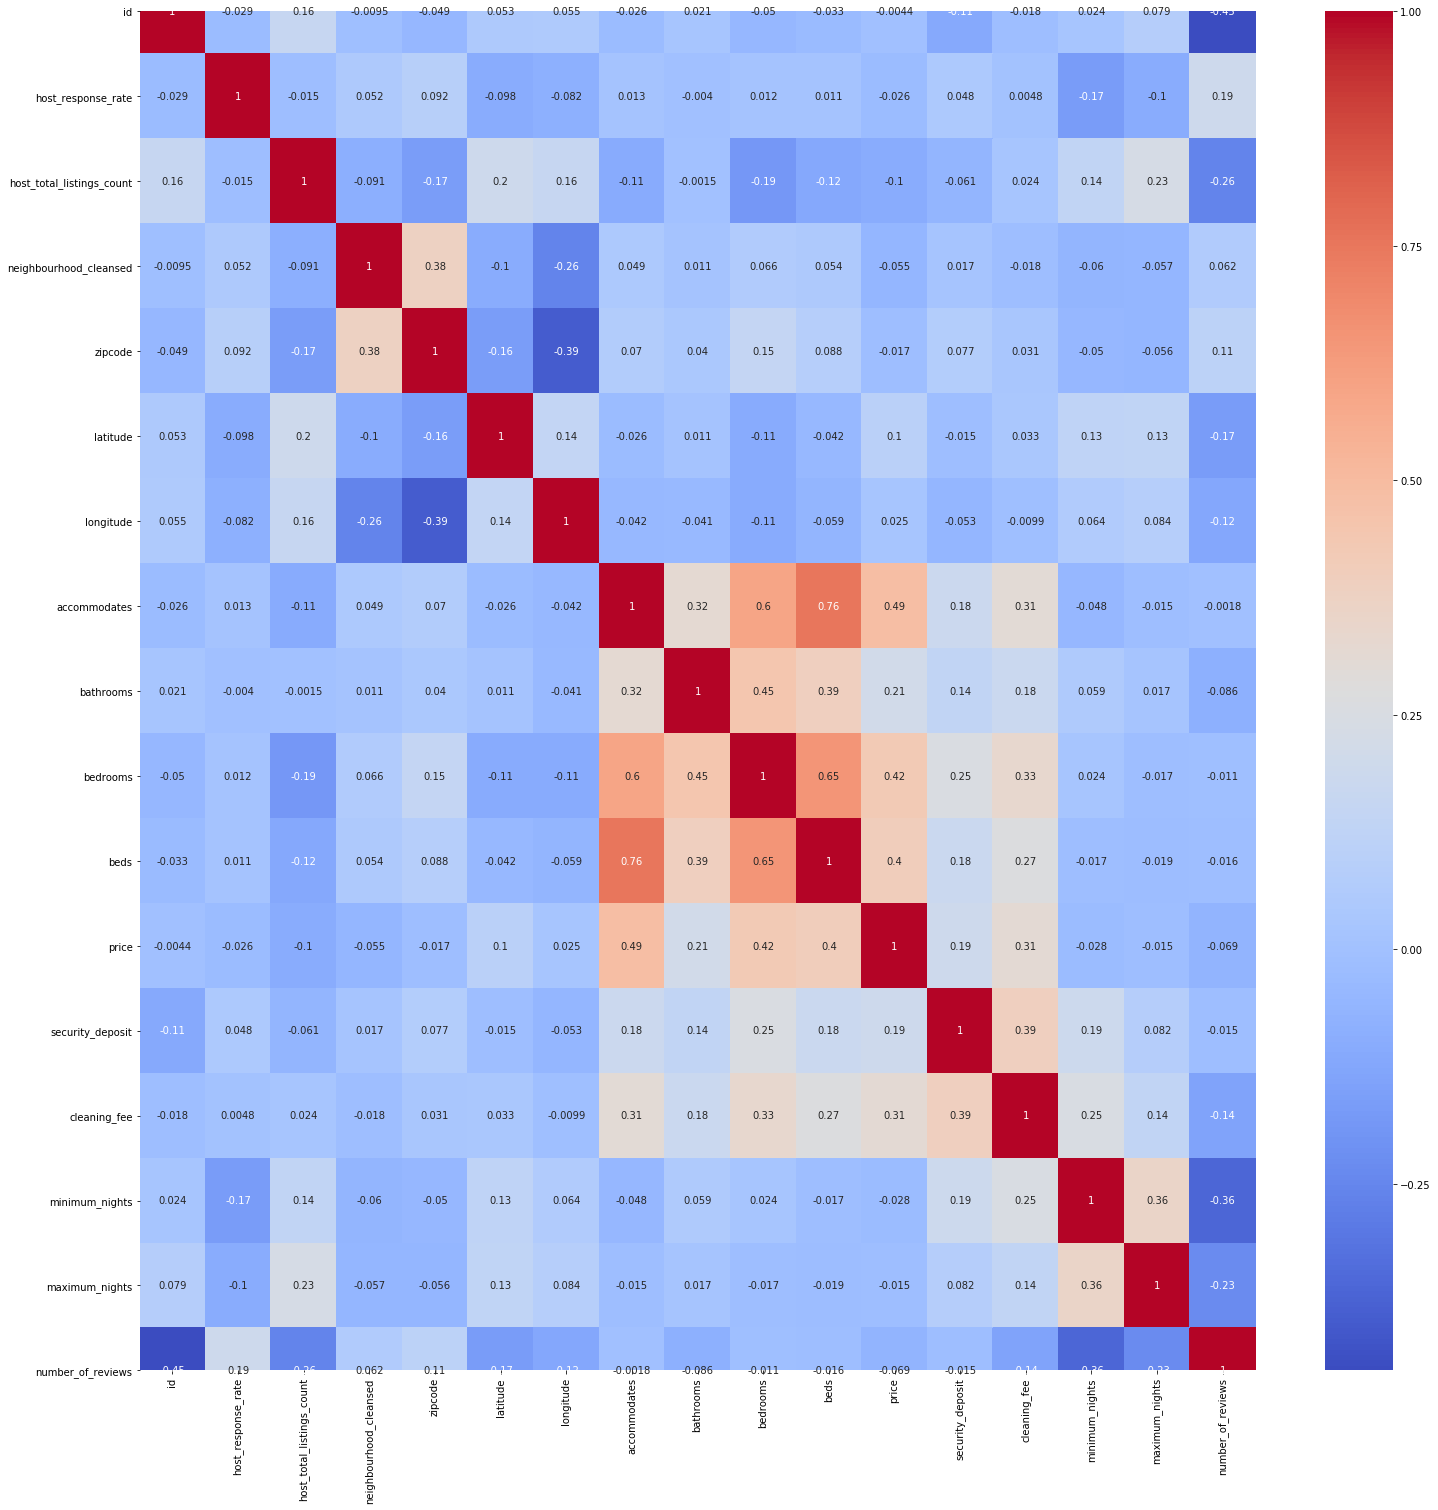

In [16]:
#Get Correlation between different variables
corr = data_new.corr(method='kendall')
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True,cmap='coolwarm')
data_new.columns

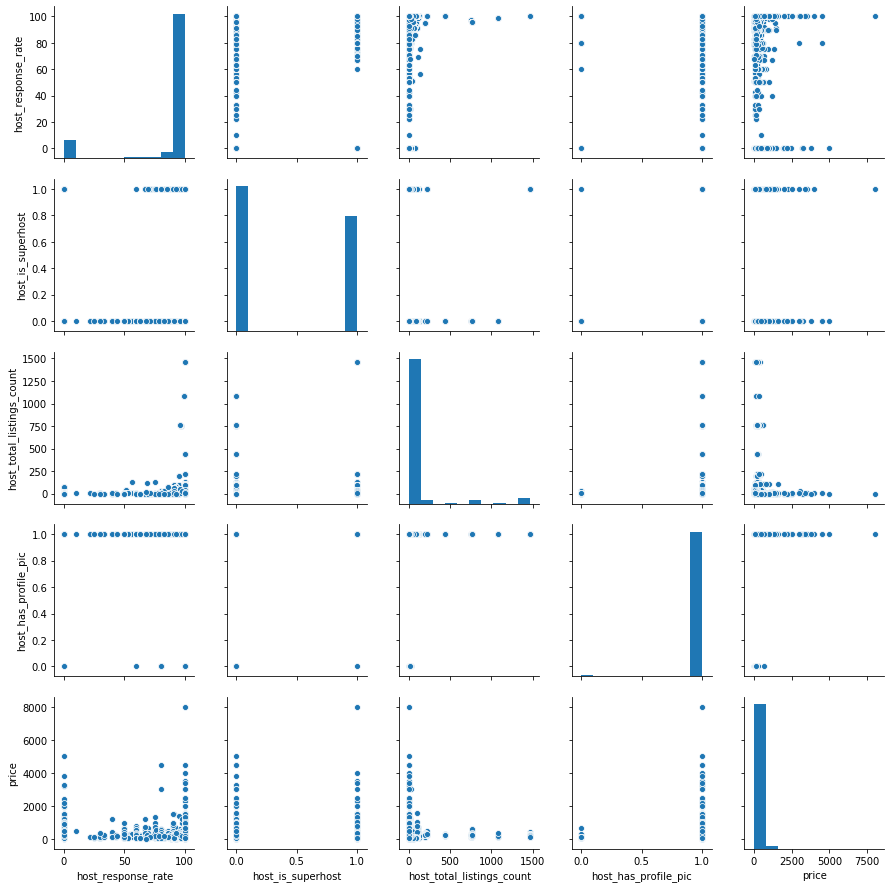

In [17]:
g = sns.pairplot(data_new[['host_response_time',
                     'host_response_rate',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'price'
                         ]]
                )

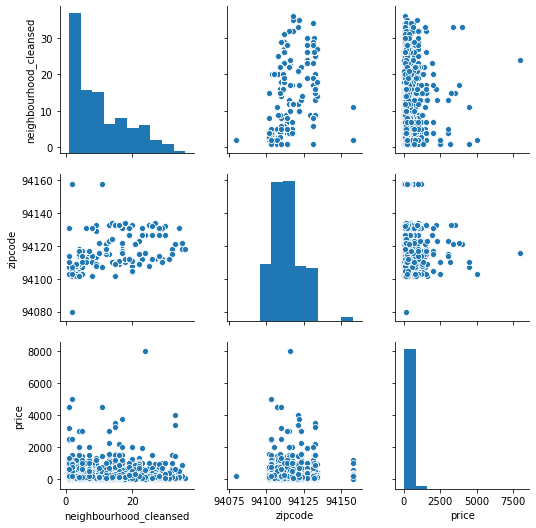

In [18]:
g = sns.pairplot(data_new[['neighbourhood_cleansed',
                     'zipcode',               
                     'price'
                     ]])

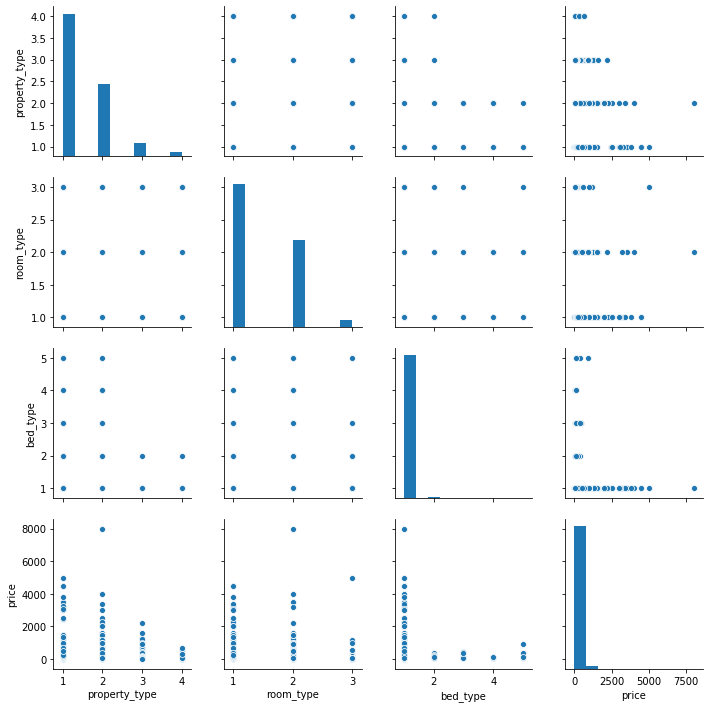

In [19]:
g = sns.pairplot(data_new[['property_type',
                     'room_type',                     
                     'bed_type',               
                     'price'
                     ]])

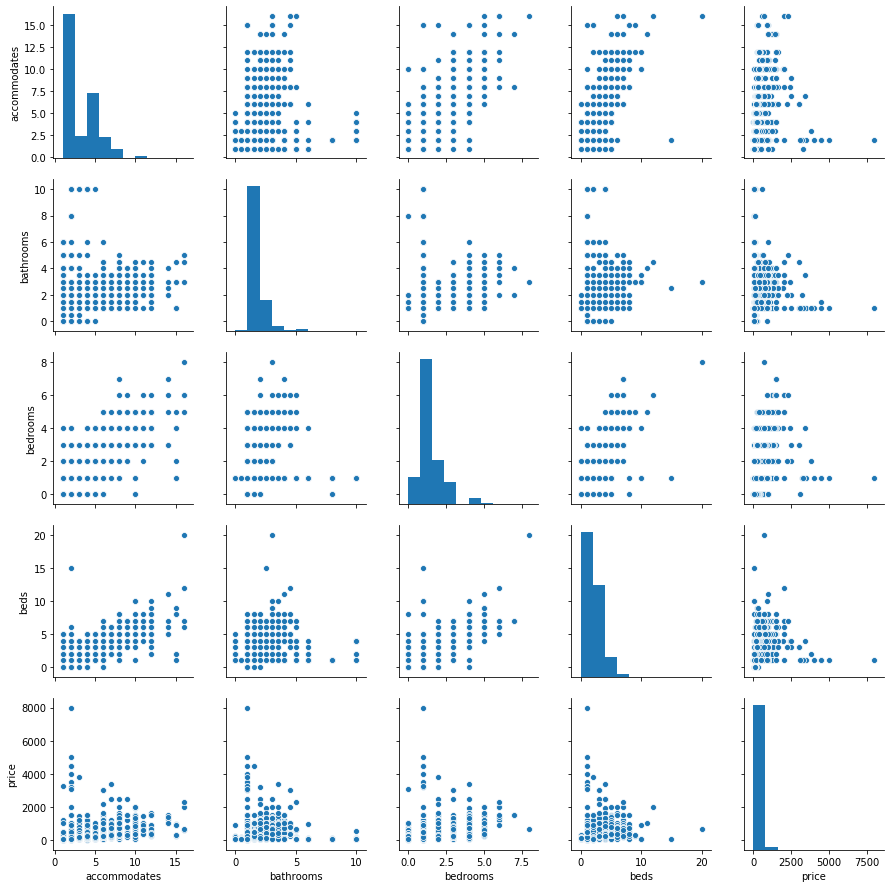

In [20]:
g = sns.pairplot(data_new[['accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',              
                     'price'
                     ]])

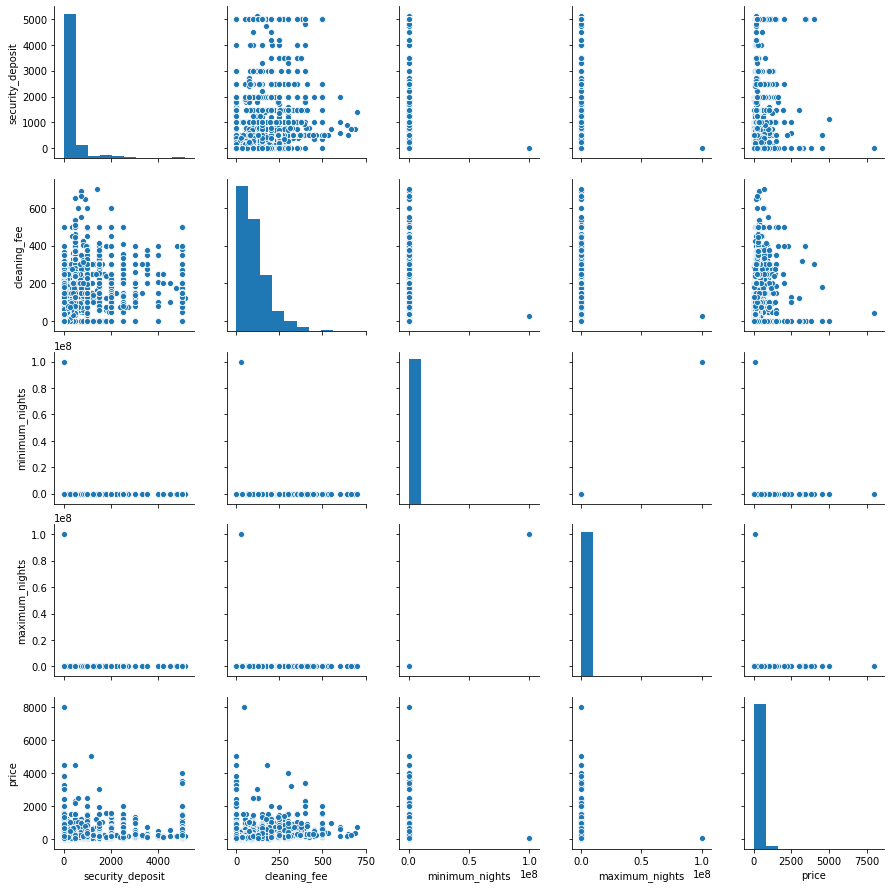

In [21]:
g = sns.pairplot(data_new[['security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',
                    'price'
                     ]])

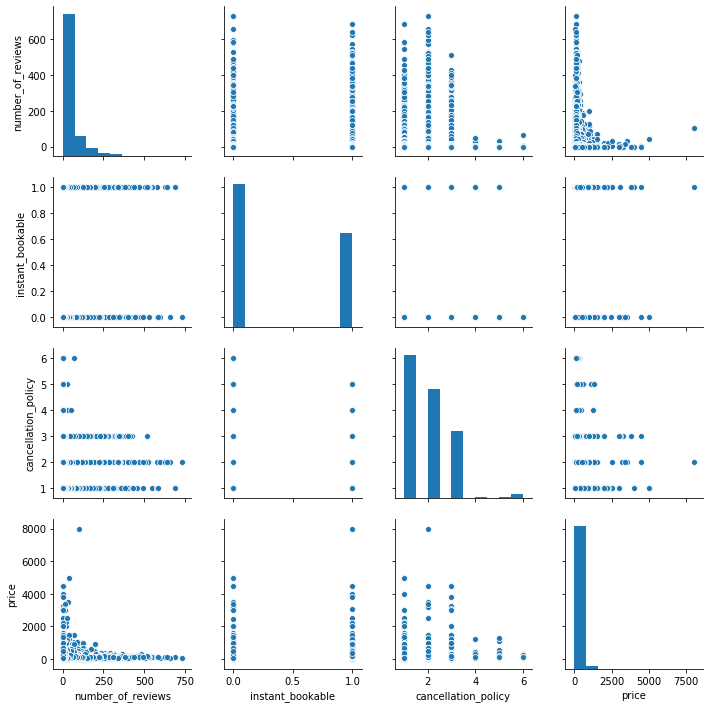

In [22]:
g = sns.pairplot(data_new[['number_of_reviews',
                     'instant_bookable',
                    'cancellation_policy',
                    'price'
                     ]])                     

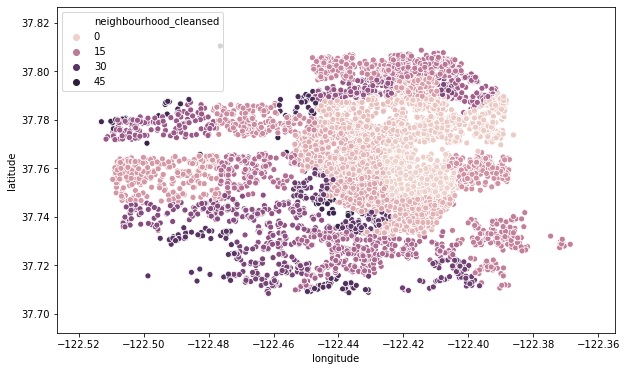

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.neighbourhood_cleansed)
plt.ioff()

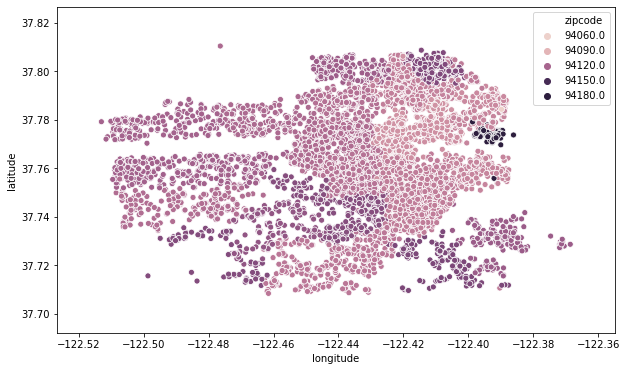

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data_new.longitude,data_new.latitude,hue=data_new.zipcode)
plt.ioff()

In [25]:
p=data_new.price.describe()
print(p)

count    7543.000000
mean      215.793186
std       258.207501
min         0.000000
25%       100.000000
50%       152.000000
75%       249.000000
max      8000.000000
Name: price, dtype: float64


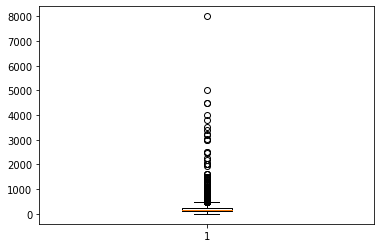

In [26]:
#boxplot of price
plt.boxplot(data_new.price)
plt.show()

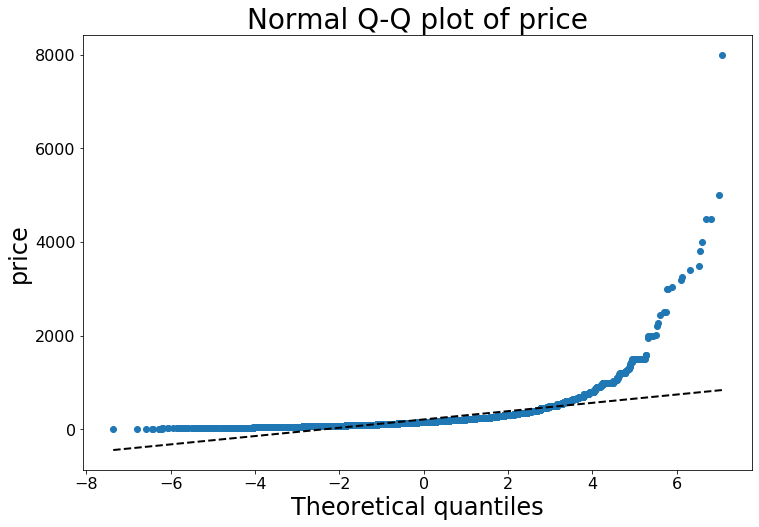

In [27]:
#Normal Q-Q plot of price
price_sort=data_new["price"].sort_values()
norm=rd.normal(0,2,len(price_sort))
norm.sort()

plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,price_sort,"o")

#generate a trend line 
z = np.polyfit(norm,price_sort, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot of price", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("price", size=24)
plt.tick_params(labelsize=16)
plt.show()

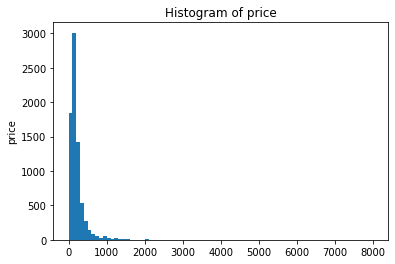

In [28]:
#Histogram
plt.title('Histogram of price')
plt.hist(data_new.price, bins=80)
plt.ylabel('price')
plt.show()

price after Outlier Removal:



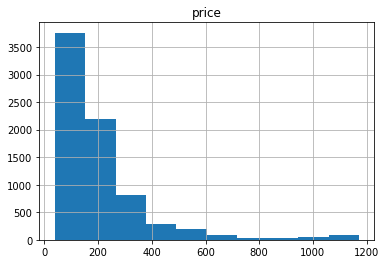

In [29]:
#Outlier Removal:remove 1% of the data from the feature
UPPERBOUND, LOWERBOUND = np.percentile(data_new.price, [1,99])
data_new.price = np.clip(data_new.price, UPPERBOUND, LOWERBOUND)
pd.DataFrame(data_new.price).hist()
print('price after Outlier Removal:\n')

In [30]:
#boxplot of price after Outlier Removal
#plt.boxplot(data_new.price)
#plt.show()

In [31]:
p=data_new.price.describe()
print(p)

count    7543.000000
mean      208.274432
std       182.469075
min        38.000000
25%       100.000000
50%       152.000000
75%       249.000000
max      1172.040000
Name: price, dtype: float64


In [32]:
# bining price
#price_ranges=[p['min']-1,p['mean'],p['max']+1]
#price_labels=['low','high']
# pd.cut(ori_data, bins, labels)
#data_new['price_level']=pd.cut(data_new['price'],price_ranges,labels=price_labels)
data_new['price_level']=pd.cut(data_new['price'],5,precision=1)

In [33]:
data_new['price_level'].value_counts()

(36.9, 264.8]      5951
(264.8, 491.6]     1097
(491.6, 718.4]      286
(945.2, 1172.0]     136
(718.4, 945.2]       73
Name: price_level, dtype: int64

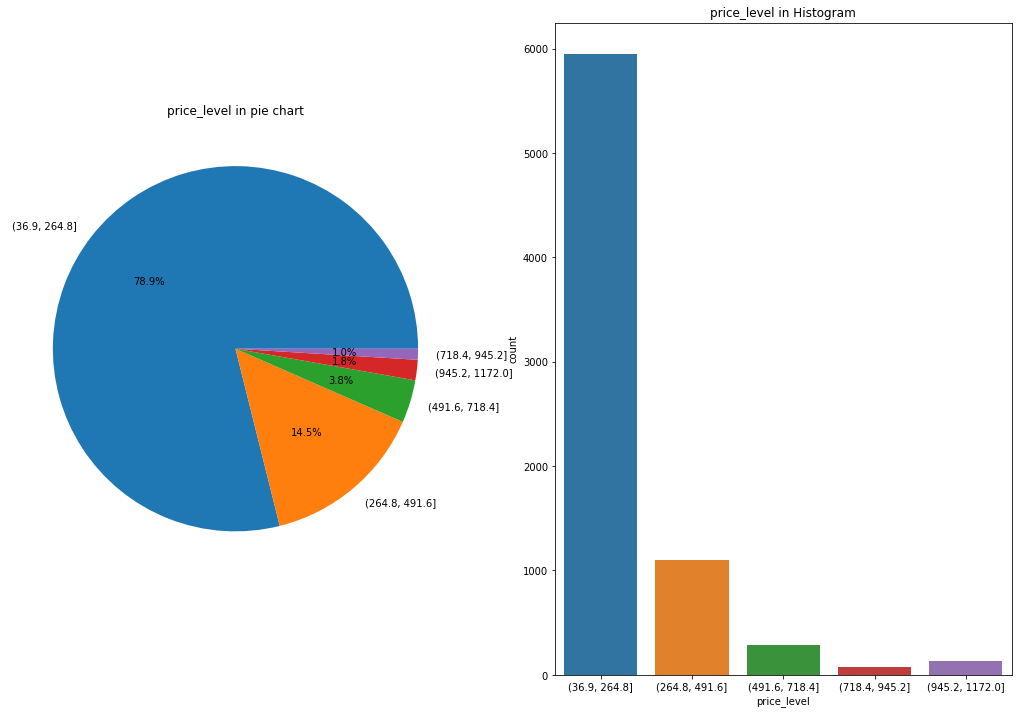

Number of low price(36.9, 264.8] : 5951
Number of medium price(264.8, 491.6]:  1097
Number of high price(491.6, 718.4]  :  286
Number of higher price(718.4, 945.2]:  73
Number of highest price(945.2, 1172.0]:  136


In [34]:
#plot value counts for price_level in pie chart and Histogram
f,ax=plt.subplots(1,2,figsize=(18,12))
#data_new['price_level'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_new['price_level'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[0],subplots=True)
ax[0].set_title('price_level in pie chart')
ax[0].set_ylabel('')
sns.countplot(label='count',x='price_level',data=data_new,ax=ax[1])
ax[1].set_title('price_level in Histogram')
plt.show()
low_price, medium_price, high_price ,highest_price,higher_price = data_new['price_level'].value_counts()
print("Number of low price(36.9, 264.8] :" , low_price)
print('Number of medium price(264.8, 491.6]: ',medium_price)
print('Number of high price(491.6, 718.4]  : ',high_price)
print('Number of higher price(718.4, 945.2]: ',higher_price)
print('Number of highest price(945.2, 1172.0]: ',highest_price)

In [35]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 26 columns):
id                           7543 non-null float64
host_response_time           7543 non-null category
host_response_rate           7543 non-null float64
host_is_superhost            7543 non-null category
host_total_listings_count    7543 non-null float64
host_has_profile_pic         7543 non-null category
neighbourhood_cleansed       7543 non-null int64
zipcode                      7300 non-null float64
latitude                     7543 non-null float64
longitude                    7543 non-null float64
property_type                7543 non-null category
room_type                    7543 non-null category
accommodates                 7543 non-null float64
bathrooms                    7543 non-null float64
bedrooms                     7543 non-null float64
beds                         7543 non-null float64
bed_type                     7543 non-null category
price                 

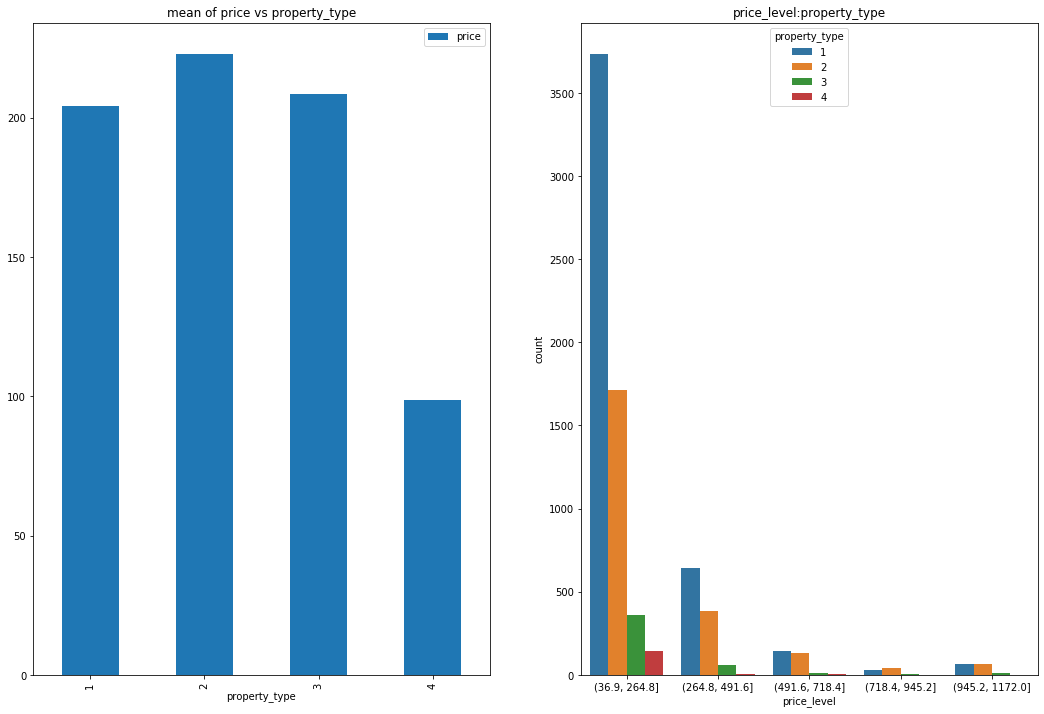

In [36]:
#plot mean of price vs property_type,and price_level:property_type
f,ax=plt.subplots(1,2,figsize=(18,12))
data_new[['price','property_type']].groupby(['property_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('mean of price vs property_type')
sns.countplot('price_level',hue='property_type',data=data_new,ax=ax[1])
ax[1].set_title('price_level:property_type')
plt.show()

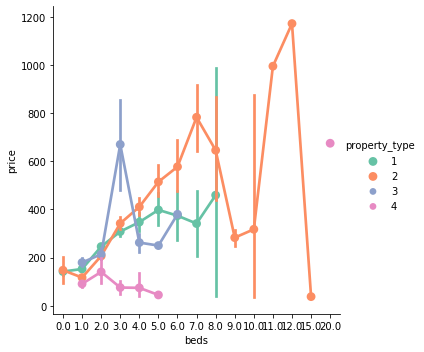

In [37]:
sns.factorplot('beds','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

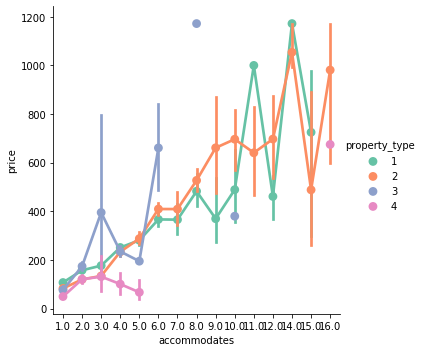

In [38]:
sns.factorplot('accommodates','price',hue='property_type',data=data_new, palette='Set2')
plt.show()

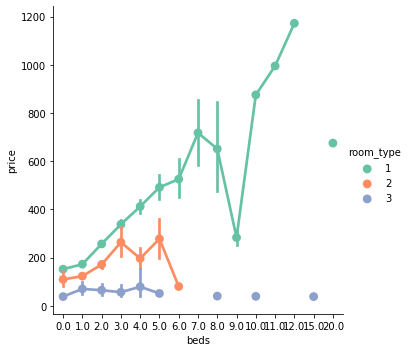

In [39]:
sns.factorplot('beds','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

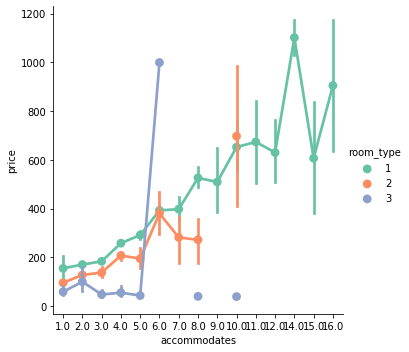

In [40]:
sns.factorplot('accommodates','price',hue='room_type',data=data_new, palette='Set2')
plt.show()

In [51]:
data_new.to_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v5/data_new.csv')
data_new.shape

(7543, 26)

In [42]:
data_new.head(2)

,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,zipcode,latitude,longitude,...,bed_type,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,price_level
0,958.0,1,90.0,1,1.0,1,4,94117.0,37.76931,-122.43386,...,1,170.0,100.0,100.0,1.0,30.0,199.0,1,2,"(36.9, 264.8]"
1,3850.0,1,100.0,1,2.0,1,17,94131.0,37.75402,-122.45805,...,1,99.0,0.0,10.0,1.0,5.0,136.0,0,1,"(36.9, 264.8]"


In [43]:
#PCA
#select necessary columns for Prediction
#'zipcode' ,'latitude' and 'longitude' are similar with 'neighbourhood_cleansed'
# 'host_response_time','host_response_rate','number_of_reviews' can be known before listing
data_PCA= data_new.loc[:,['price',
                     'host_is_superhost',
                     'host_total_listings_count',
                     'host_has_profile_pic',
                     'neighbourhood_cleansed',
                     'property_type',
                     'room_type',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'bed_type',               
                     'security_deposit',
                     'cleaning_fee',
                     'minimum_nights',
                     'maximum_nights',                     
                     'instant_bookable',
                      'cancellation_policy']]
data_PCA.shape

(7543, 18)

In [44]:
data_PCA.head()

,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,170.0,1,1.0,1,4,1,1,3.0,1.0,1.0,2.0,1,100.0,100.0,1.0,30.0,1,2
1,99.0,1,2.0,1,17,2,2,2.0,1.0,1.0,1.0,1,0.0,10.0,1.0,5.0,0,1
2,65.0,1,10.0,1,7,1,2,2.0,4.0,1.0,1.0,1,200.0,50.0,32.0,60.0,0,1
3,65.0,1,10.0,1,7,1,2,2.0,4.0,1.0,1.0,1,200.0,50.0,32.0,90.0,0,1
4,475.0,0,2.0,1,4,2,1,4.0,1.5,2.0,2.0,1,0.0,225.0,4.0,1125.0,0,2


In [45]:
data_PCA.isnull().sum()

price                        0
host_is_superhost            0
host_total_listings_count    0
host_has_profile_pic         0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
security_deposit             0
cleaning_fee                 0
minimum_nights               0
maximum_nights               0
instant_bookable             0
cancellation_policy          0
dtype: int64

In [46]:
data_PCA.to_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v5/data_PCA.csv')

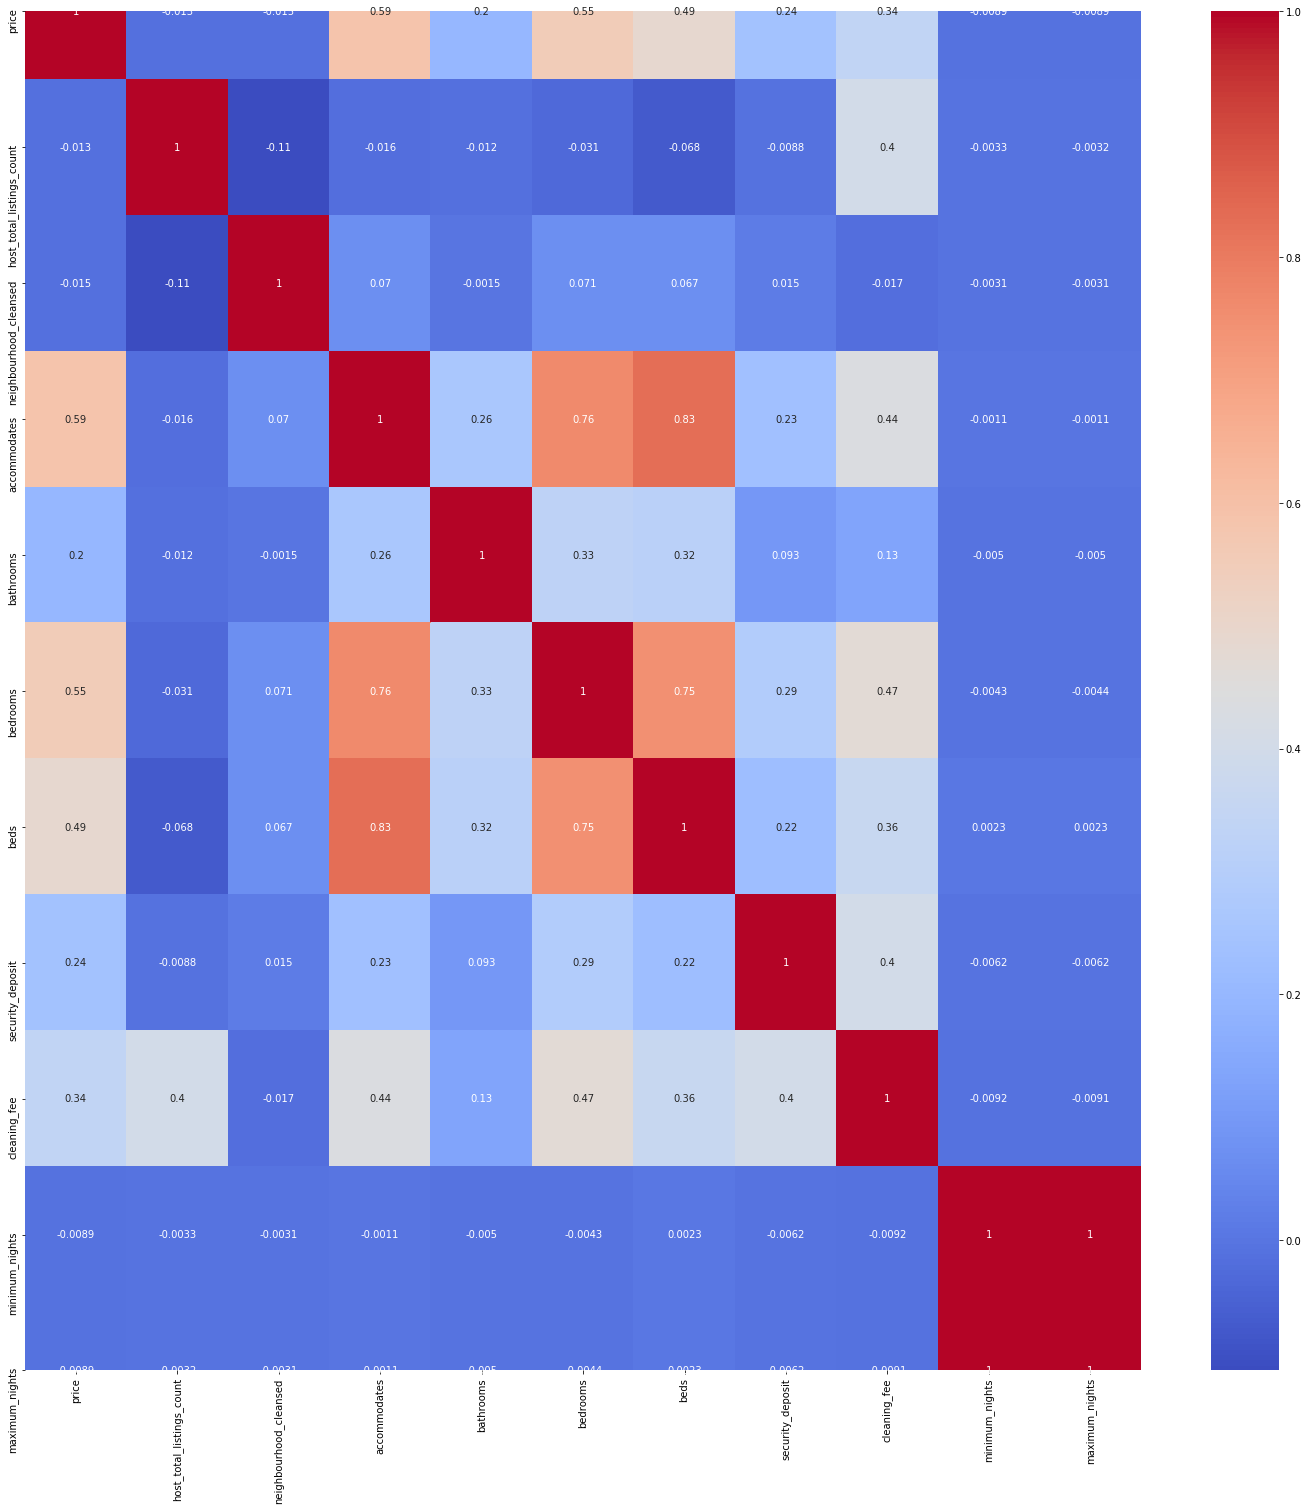

In [47]:
"""
When encountering a high degree of correlation between variables, 
the conventional approach is to calculate the correlation matrix between the variables,
then find two variables with a correlation higher than a certain value (such as 0.75),
and then delete one of them.
"""

#calculating the correlation between features
correlation=data_PCA.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [48]:
#drop the variables with a correlation higher than 0.75 (here we set it to 0.75)
data_PCA.drop(['accommodates', 'bedrooms','maximum_nights'], axis=1, inplace=True)

In [49]:
data_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 15 columns):
price                        7543 non-null float64
host_is_superhost            7543 non-null category
host_total_listings_count    7543 non-null float64
host_has_profile_pic         7543 non-null category
neighbourhood_cleansed       7543 non-null int64
property_type                7543 non-null category
room_type                    7543 non-null category
bathrooms                    7543 non-null float64
beds                         7543 non-null float64
bed_type                     7543 non-null category
security_deposit             7543 non-null float64
cleaning_fee                 7543 non-null float64
minimum_nights               7543 non-null float64
instant_bookable             7543 non-null category
cancellation_policy          7543 non-null category
dtypes: category(7), float64(7), int64(1)
memory usage: 524.1 KB


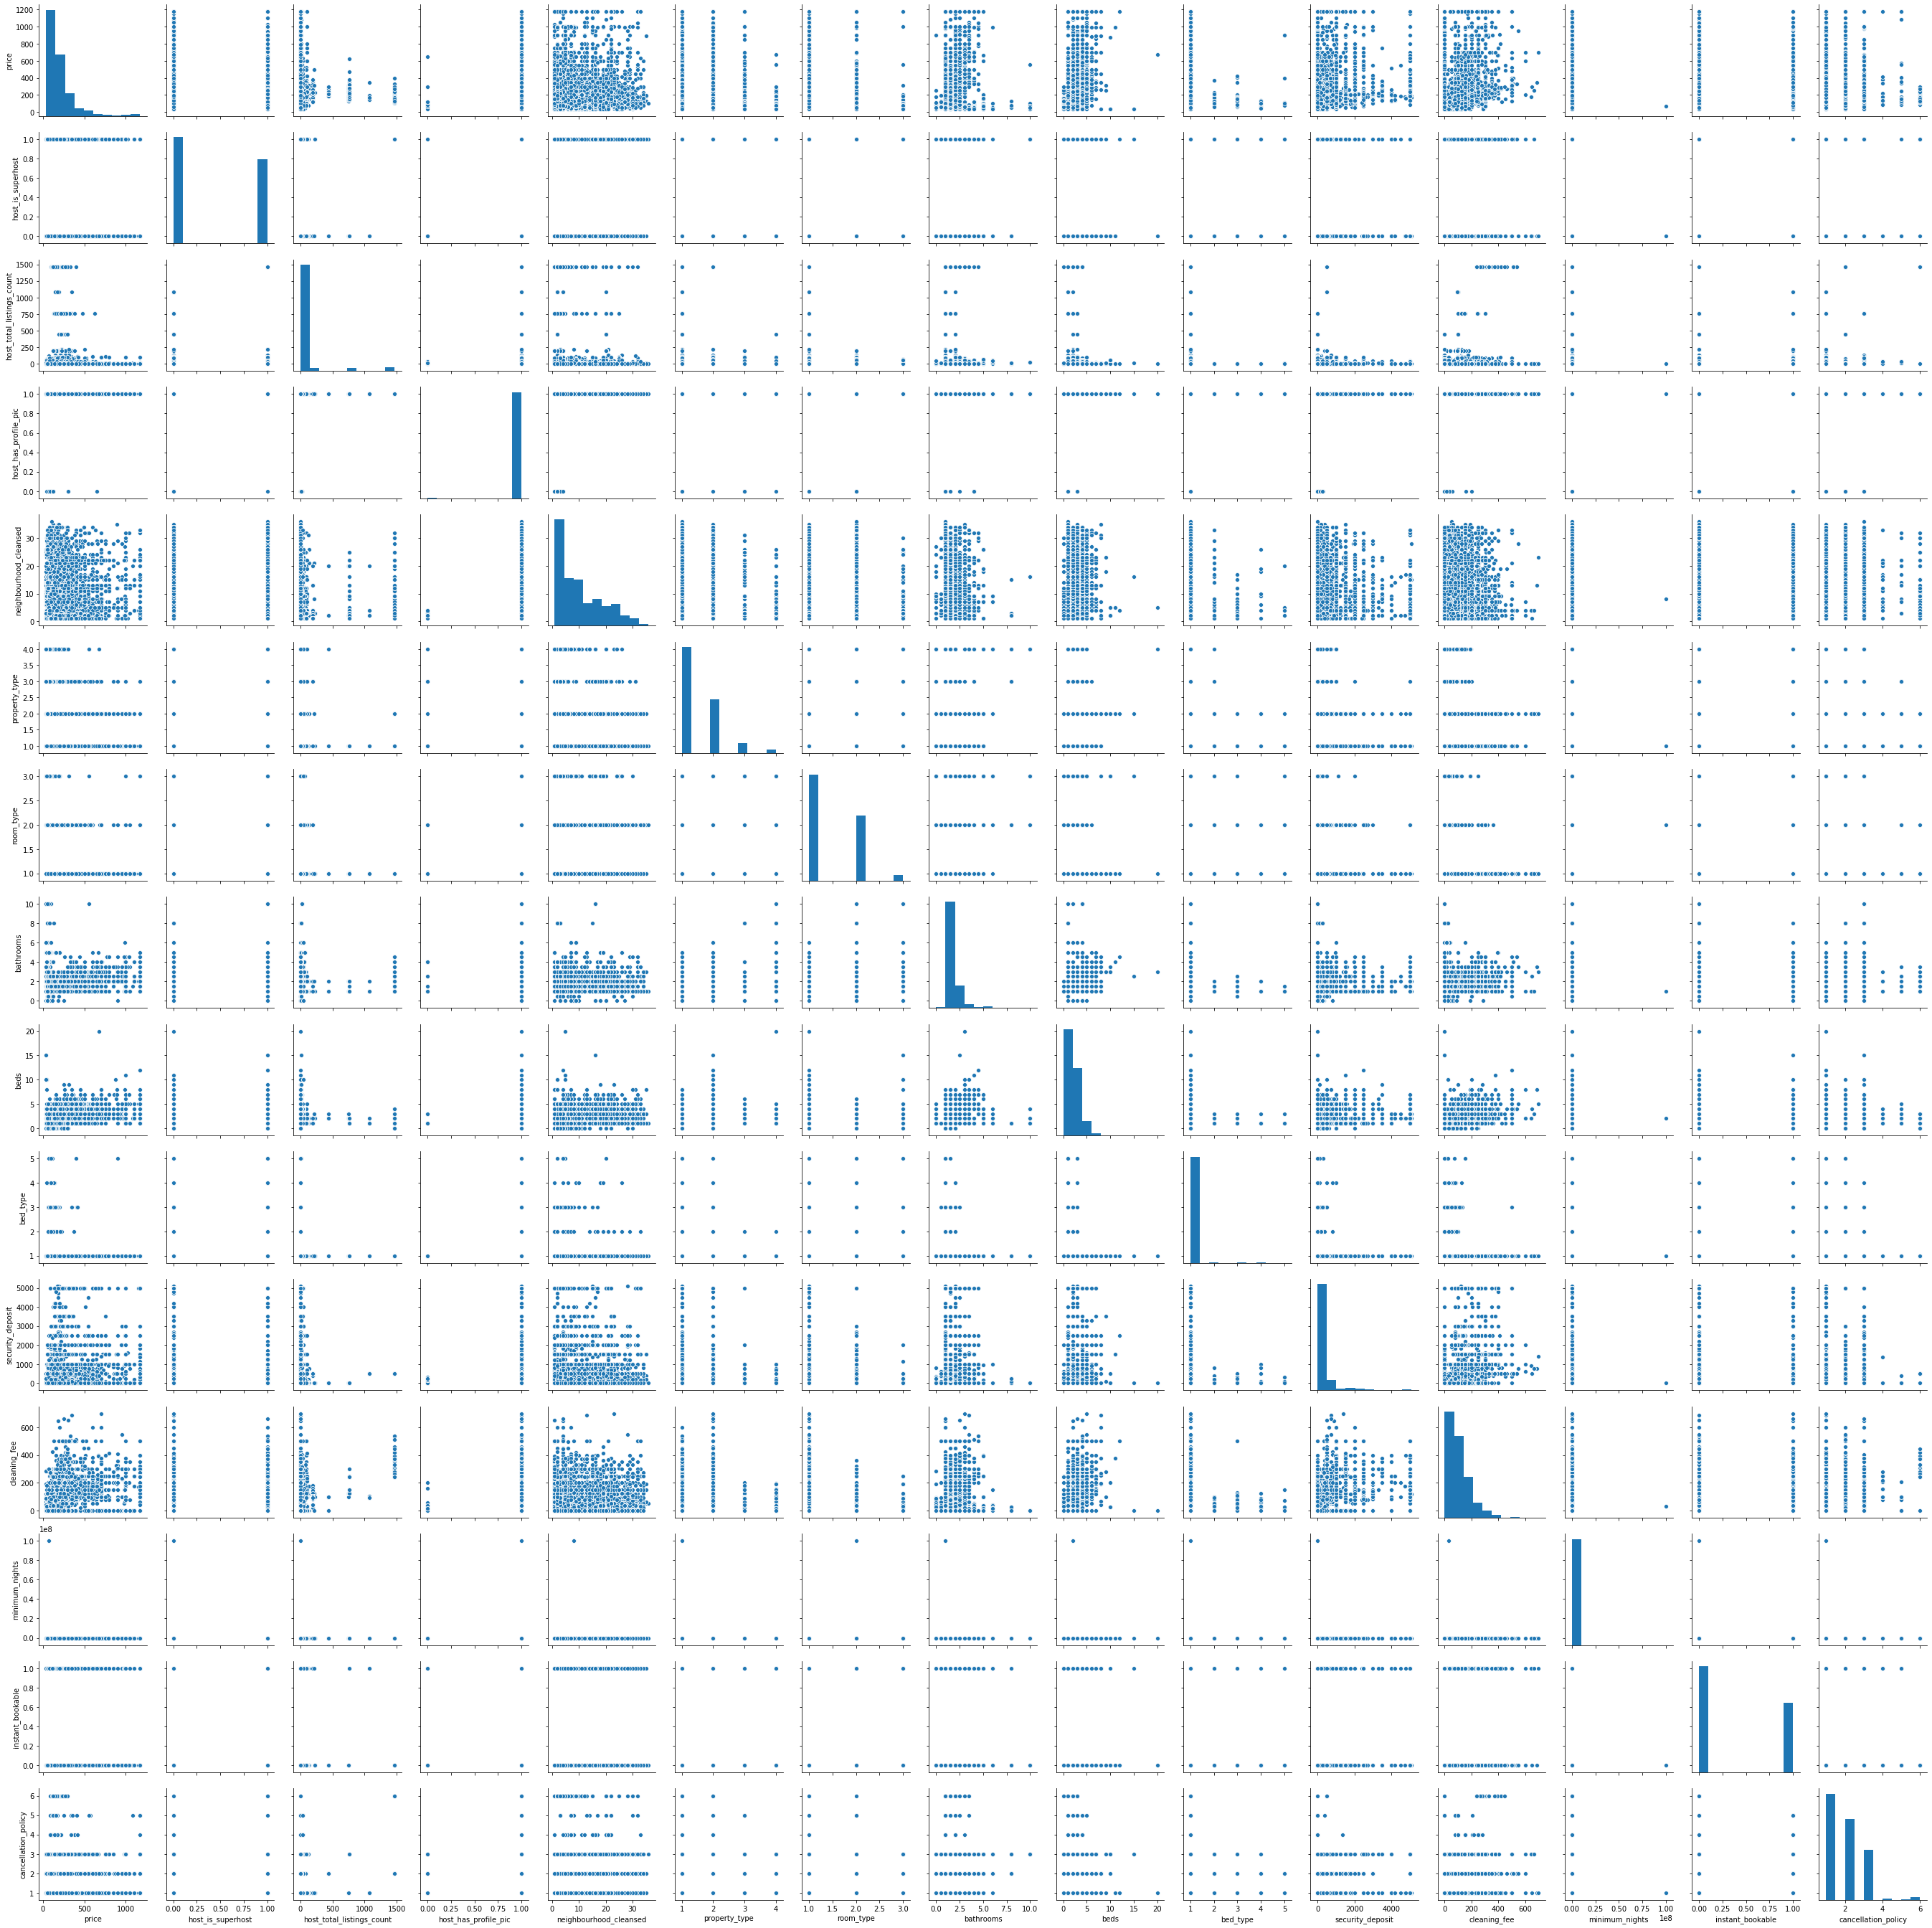

In [50]:
g = sns.pairplot(data_PCA)

In [157]:
# split into training and testing datasets
X = data_PCA.iloc[:, 1:].values
y=  data_PCA["price"].values
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=1)
print(X_train)
print(y_train)

[[0 16.0 1 ... 1.0 0 5]
 [0 1.0 1 ... 30.0 1 2]
 [1 2.0 1 ... 2.0 1 1]
 ...
 [0 2.0 1 ... 3.0 0 2]
 [1 3.0 1 ... 2.0 0 1]
 [1 1.0 1 ... 2.0 0 2]]
[1172.04  220.     65.   ...  350.    105.    300.  ]


In [159]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

ValueError: could not convert string to float: 'NULL'

In [ ]:
#obtain the eigenpairs of the Wine covariance matrix:
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [ ]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

In [ ]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()